<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Nonlinear_Petiau_mode_in_EMDrive_cavity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipj, ellipk

plt.rcParams.update({
    "font.size": 12,
    "axes.labelsize": 12,
    "axes.titlesize": 13,
    "legend.fontsize": 11,
    "figure.figsize": (7, 6)
})


In [2]:
# Model parameters
omega = 1.0        # effective frequency
k = 0.8            # elliptic modulus
lam = 0.1          # nonlinear coupling λ

# Phase shifts (Petiau wave combination)
delta1 = 0.0
delta2 = 5.0


In [3]:
A = np.sqrt(2 * k**2 * omega**2 / (lam * (1 + k**2)))
B = np.sqrt(omega**2 + lam * A**2)

# Cavity length (periodic approximation)
L = 4 * ellipk(k**2) / B

A, B, L


(np.float64(2.7937211830783126),
 np.float64(1.3343492064965785),
 np.float64(5.981351112437885))

In [4]:
xi = np.linspace(0, L, 2000)


In [5]:
def jacobi_cn(u, k):
    sn, cn, dn, _ = ellipj(u, k**2)
    return cn, sn


In [6]:
def psi_petiau(x):
    u = B * x + delta1
    v = B * x + delta2

    cnu, snu = jacobi_cn(u, k)
    cnv, snv = jacobi_cn(v, k)

    numerator = cnu * cnv - k**2 * snu * snv
    denominator = 1 - k**2 * snu**2 * snv**2

    return A * numerator / denominator


In [7]:
psi = psi_petiau(xi)


In [8]:
dpsi = np.gradient(psi, xi)

Tzz = (
    dpsi**2
    - 0.5 * omega**2 * psi**2
    + 0.25 * lam * psi**4
)


In [9]:
# Evaluate at xi = 0 and xi = L/2
idx_0 = 0
idx_L2 = np.argmin(np.abs(xi - L/2))

Delta_T = Tzz[idx_L2] - Tzz[idx_0]
Delta_T


np.float64(-0.1107099197678032)

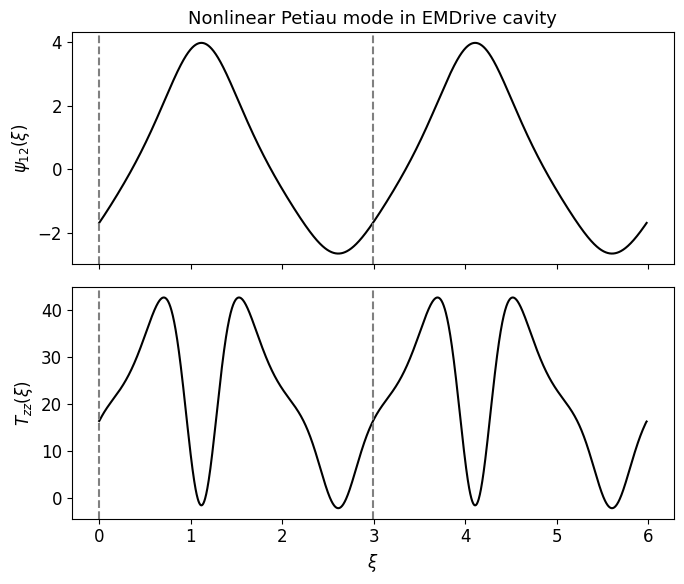

In [10]:
fig, axes = plt.subplots(2, 1, sharex=True)

# Top panel: nonlinear field
axes[0].plot(xi, psi, color="black")
axes[0].set_ylabel(r"$\psi_{12}(\xi)$")
axes[0].set_title("Nonlinear Petiau mode in EMDrive cavity")
axes[0].axvline(0, linestyle="--", color="gray")
axes[0].axvline(L/2, linestyle="--", color="gray")

# Bottom panel: stress tensor
axes[1].plot(xi, Tzz, color="black")
axes[1].set_ylabel(r"$T_{zz}(\xi)$")
axes[1].set_xlabel(r"$\xi$")
axes[1].axvline(0, linestyle="--", color="gray")
axes[1].axvline(L/2, linestyle="--", color="gray")

plt.tight_layout()
plt.show()


In [11]:
fig.savefig("petiau_emdrive_figure1.pdf", dpi=300, bbox_inches="tight")
fig.savefig("petiau_emdrive_figure1.png", dpi=300, bbox_inches="tight")
